# REGRESSION

## GOAL: To understand the purpose and use of linear and polynomial regression. 
## GOAL: To demonstrate underfitting and overfitting
## GOAL: To demonstrate the purpose of training, test and validation sets
## GOAL: To explain the effect of outliers and suggest strategies of data cleanup

### Regression is a ML technique that allows us to predict values of functions given the values of an argument, provided that the function can be modeled as a polynomial.

In [1]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
# Define a function that generates data

def generate_data(size):
  X = np.random.rand(size) * 100.0
  Y = X ** 2 + 7
  Y = Y + np.random.randn(Y.shape[0]) * 300
  return X, Y

In [3]:
# Generate the full data and split it into a training set and test set.

X_full, Y_full = generate_data(20)

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.5, random_state=42)

Text(0.5,1,'Train set')

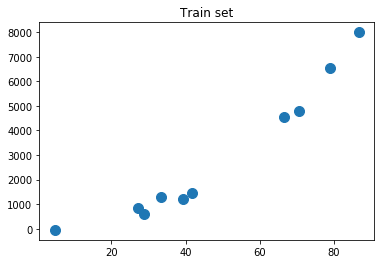

In [4]:
# Plot the train set

plt.plot(X_train, Y_train, ".", markersize=20)
plt.title("Train set")


Text(0.5,1,'Test set')

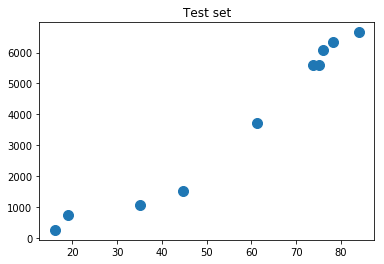

In [5]:
# Plot the test set

plt.plot(X_test, Y_test, ".", markersize=20)
plt.title("Test set")


In [6]:
# Fit a straight line, a parabola and a polynomial of 11th degree
# (2 points define a line - represented by a 1st degree polynome, 10 points define a 11th degree polynome!)

# The function calls only differ in the last parameter, which is the degree of a polynomial being fitted to the data.

coefs_lin = poly.polyfit(X_train, Y_train, 1)
coefs_sqr = poly.polyfit(X_train, Y_train, 2)
coefs_ten = poly.polyfit(X_train, Y_train, 11)

# The library warns us against using the 10th degree polynimial... Dear library, I do it for the teaching purposes!

/Users/sjschmidt/Codefellows/401/python/playground/ml/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:8: RankWarning: The fit may be poorly conditioned
  


In [7]:
# Compute set of Y's

# Generate a dense set of X points
X_line = np.linspace(0, 100, 10000)

# Compute Y's corresponding to all the X's
ffit_lin = poly.polyval(X_line, coefs_lin)
ffit_sqr = poly.polyval(X_line, coefs_sqr)
ffit_ten = poly.polyval(X_line, coefs_ten)


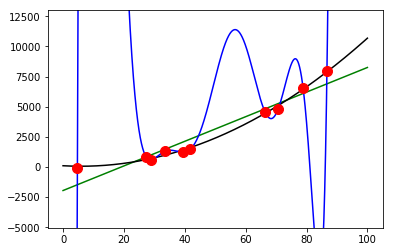

In [8]:
# Plot the training set, along with the fitted polynomials of various degrees

plt.ylim(min(Y_train - 5000), max(Y_train + 5000))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_ten, "b")


plt.plot(X_train, Y_train, "r.", markersize=20)
plt.show()

### As you can see, the best fit is achieved by the 11th degree polynomial. Should we use it in practice? Notice the wild oscillations of its plot.

### Well, let's how well our polynomials fit the test set points!

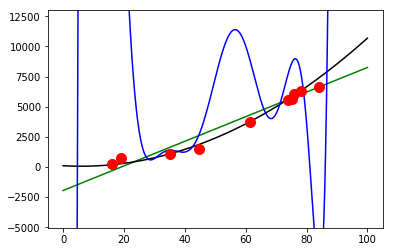

In [9]:
plt.ylim(min(Y_train - 5000), max(Y_train + 5000))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_ten, "b")

plt.plot(X_test, Y_test, "r.", markersize=20)
plt.show()

### Not surprising - parabola fits the best (remember - we generated the data using a quadratic function), linear is somewhat worse, and 11th degree polynomial is a total disaster. 

### These are the examples of a good fit (quadratic regressor), underfitting (linear regressor) and overfitting (11th degree polynomial).

### Underfitting happens when your ML model has fewer parameters than required for the optimal model.
### Overfitting happens when your ML model has too many parameters, and you model not only the underlying model, but the accompanying noise. 

In [10]:
# Let's compute the Mean Squared Error (MSE) for all three polynomials

mse_lin = mean_squared_error(Y_test, poly.polyval(X_test, coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

MSE for a linear regressor:  291560.75562878686


In [11]:
mse_sqr = mean_squared_error(Y_test, poly.polyval(X_test, coefs_sqr))
print(print("MSE for a quadratic regressor: ", mse_sqr))

MSE for a quadratic regressor:  94988.6320072375
None


In [12]:
mse_ten = mean_squared_error(Y_test, poly.polyval(X_test, coefs_ten))
print(print("MSE for a 11th degree regressor: ", mse_ten))

MSE for a 11th degree regressor:  506650507.87972033
None


### The numbers agree with the conclusions we drew from the plots. 
### A question remains, though: how do we know, given data points, what degree of a regressor to choose?
### Answer: we try several. On what set? Not on the test set (God forbid!), not on the training set (because then, in our case, we would choose the 11th degree polynomial - it gave zero training error)... So, what to do?
### Answer: split the training set again. One part will be training set, the other is called a validation set. We fit the model on the training set and compute the error on the validation set.

## Is that all? No! It's a pinnacle of the tip of the iceberg. Volumes are written about regression. I will show you only one problem, relevant to you.

# OUTLIERS!

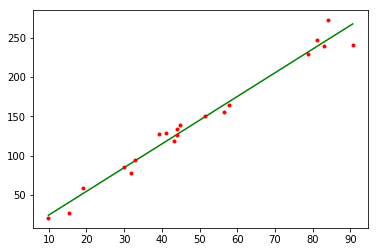

MSE for a linear regressor:  131.9265029360734


In [13]:
# Let's generate linear data with some noise, fit a linear regressor and fit it.

X = np.random.rand(20) * 100.0
Y = X * 3 - 5
Y = Y + np.random.randn(Y.shape[0]) * 10

coefs_lin = poly.polyfit(X, Y, 1)

X_line = np.linspace(min(X), max(X), 10000)

# Compute Y's corresponding to all the X's
ffit_lin = poly.polyval(X_line, coefs_lin)

plt.plot(X_line, ffit_lin, "g")
plt.plot(X, Y, "r.")
plt.show()

# We do not include the last point, because we will move it

mse_lin = mean_squared_error(Y[:-1], poly.polyval(X[:-1], coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

### All is peachy, isn't it? It's quiet... Too quiet! Here comes the Imperial Fleet:

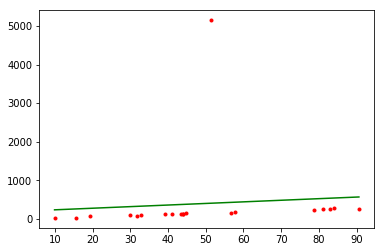

MSE for a linear regressor:  63295.373634132004


In [14]:
# Let's move the last point up.

Y[-1] += 5000;
coefs_lin = poly.polyfit(X, Y, 1)
ffit_lin = poly.polyval(X_line, coefs_lin)

plt.plot(X_line, ffit_lin, "g")
plt.plot(X, Y, "r.")
plt.show()

mse_lin = mean_squared_error(Y[:-1], poly.polyval(X[:-1], coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

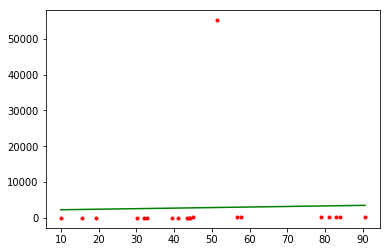

MSE for a linear regressor:  7640467.014785688


In [15]:
# Let's move the last more!

Y[-1] += 50000;
coefs_lin = poly.polyfit(X, Y, 1)
ffit_lin = poly.polyval(X_line, coefs_lin)

plt.plot(X_line, ffit_lin, "g")
plt.plot(X, Y, "r.")
plt.show()

mse_lin = mean_squared_error(Y[:-1], poly.polyval(X[:-1], coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

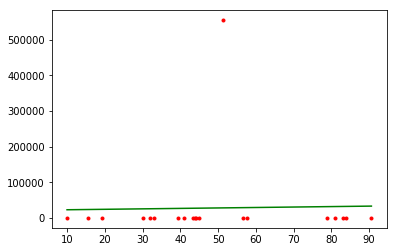

MSE for a linear regressor:  777965900.410261


In [16]:
# MORE!!!

Y[-1] += 500000;
coefs_lin = poly.polyfit(X, Y, 1)
ffit_lin = poly.polyval(X_line, coefs_lin)

plt.plot(X_line, ffit_lin, "g")
plt.plot(X, Y, "r.")
plt.show()

mse_lin = mean_squared_error(Y[:-1], poly.polyval(X[:-1], coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

### The conclusion: EVEN ONE outlier can make your predicions terribly wrong. The farther the outlier - the worse predictions. No boundaries. All is lost. Wait! No! You can sanitize your data!


### How to sanitize the data? Well, that depends on the data and how much you know about it. One simple algorithm is: fit a polynomial, remove all points that are, say, in the 90th percentile of distance from the said polynome, repeat until convergence. 

### The implementation is left to the student as an exercise.


# THE END